In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
JSON_DATA_PATH = "/Users/sreeharirammohan/Desktop/Sit-to-stand test/output"

In [3]:
all_json_files = os.listdir(JSON_DATA_PATH)

In [4]:
#order the json files from the first frame to the last. 
all_json_files.sort()

In [5]:
#first item in the list is the DS STORE, remove
del all_json_files[0]

In [6]:
all_json_files

['30_sec_sit_stand_000000002584_keypoints.json',
 '30_sec_sit_stand_000000002585_keypoints.json',
 '30_sec_sit_stand_000000002586_keypoints.json',
 '30_sec_sit_stand_000000002587_keypoints.json',
 '30_sec_sit_stand_000000002588_keypoints.json',
 '30_sec_sit_stand_000000002589_keypoints.json',
 '30_sec_sit_stand_000000002590_keypoints.json',
 '30_sec_sit_stand_000000002591_keypoints.json',
 '30_sec_sit_stand_000000002592_keypoints.json',
 '30_sec_sit_stand_000000002593_keypoints.json',
 '30_sec_sit_stand_000000002594_keypoints.json',
 '30_sec_sit_stand_000000002595_keypoints.json',
 '30_sec_sit_stand_000000002596_keypoints.json',
 '30_sec_sit_stand_000000002597_keypoints.json',
 '30_sec_sit_stand_000000002598_keypoints.json',
 '30_sec_sit_stand_000000002599_keypoints.json',
 '30_sec_sit_stand_000000002600_keypoints.json',
 '30_sec_sit_stand_000000002601_keypoints.json',
 '30_sec_sit_stand_000000002602_keypoints.json',
 '30_sec_sit_stand_000000002603_keypoints.json',
 '30_sec_sit_stand_0

In [7]:
filename = os.path.join(JSON_DATA_PATH, all_json_files[1])

In [8]:
print(filename)

/Users/sreeharirammohan/Desktop/Sit-to-stand test/output/30_sec_sit_stand_000000002585_keypoints.json


In [17]:
'''
This method finds the angle between the 8-9 and 9-10 segments. 
'''
def determine_angle_for_json_file(json_file_data, person_number, segment1, segment2):
    
    first_coordinate = int(segment1.split('-')[0])
    
    second_coordinate = int(segment1.split('-')[1])
    
    redundant_second_coordinate = int(segment2.split('-')[0])
    
    third_coordinate = int(segment2.split('-')[1])
    
    if not redundant_second_coordinate == second_coordinate:
        print("ERROR: Two points you find the angle between must be adjacent (share a common vertex)")
        return None
    
    #print(first_coordinate, second_coordinate, third_coordinate)
    
    #No people detected in the scene
    if (len(json_file_data["people"]) == 0):
        return
    
    # 8th segment x, y
    x_8 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*first_coordinate]
    y_8 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*first_coordinate + 1]

    # 9th segment x, y
    x_9 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*second_coordinate]
    y_9 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*second_coordinate + 1]

    #10th
    x_10 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*third_coordinate]
    y_10 = json_file_data["people"][person_number]["pose_keypoints_2d"][3*third_coordinate + 1]
    
    slope_8_9 = (y_9 - y_8)/(x_9 - x_8)
    slope_9_10 = (y_10 - y_9)/(x_10 - x_9)
    
    temp_calc = (slope_9_10 - slope_8_9)/(1 + slope_8_9*slope_9_10)
    
    angle_rad = np.arctan(temp_calc)
    
    angle = angle_rad * (180/np.pi)
    
    
    if(angle < 0):
        angle = -angle
    
    
        
    return angle
    

In [18]:
frame_number = 0
angles = []

for name in all_json_files:
    
    filename = os.path.join(JSON_DATA_PATH, name)
    
    with open(filename, 'r') as j:
        json_file_data = json.load(j)
        angle = determine_angle_for_json_file(json_file_data=json_file_data, person_number=0, segment1="8-9", segment2='9-10')
        angles.append(angle)
        frame_number += 1    

In [19]:
len(angles)

475

In [20]:
frame_number

475

In [21]:
frame_x = list(range(0, frame_number))

(0, 110)

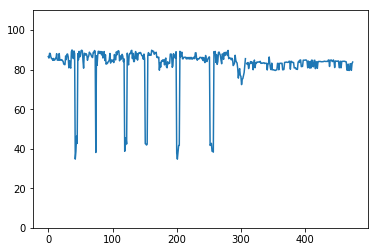

In [23]:
plt.plot(frame_x, angles)
plt.ylim(0, 110)
# count the number of times the person squatted based on the number of times the angle is 90 degrees

In [18]:
print(json.dumps(json_file_data, indent=1, sort_keys=True))

{
 "people": [
  {
   "face_keypoints_2d": [],
   "face_keypoints_3d": [],
   "hand_left_keypoints_2d": [],
   "hand_left_keypoints_3d": [],
   "hand_right_keypoints_2d": [],
   "hand_right_keypoints_3d": [],
   "pose_keypoints_2d": [
    971.858,
    153.674,
    0.959542,
    980.574,
    271.264,
    0.936556,
    904.157,
    271.386,
    0.905666,
    886.382,
    391.935,
    0.912959,
    921.807,
    474.298,
    0.904693,
    1054.26,
    271.202,
    0.891523,
    1086.49,
    391.982,
    0.916374,
    1021.79,
    477.237,
    0.914392,
    977.705,
    494.972,
    0.790378,
    927.686,
    492.047,
    0.738472,
    895.167,
    686.302,
    0.815198,
    877.556,
    857.017,
    0.859328,
    1027.72,
    497.852,
    0.758702,
    1042.36,
    683.352,
    0.762314,
    1036.44,
    859.905,
    0.804962,
    957.027,
    144.658,
    0.946541,
    989.423,
    144.736,
    0.910014,
    939.373,
    159.507,
    0.895136,
    1010.08,
    162.357,
    0.932306,
    1

In [19]:
json_file_data["people"][0]["pose_keypoints_2d"][8]

0.905666

In [20]:
determine_angle_for_json_file(json_file_data=json_file_data, person_number=0, segment1="8-9", segment2='9-10')

83.84331528274771